<a href="https://colab.research.google.com/github/spandanbhandari/LLMs-from-Scratch/blob/main/finetuningClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch

In [ ]:
pip install llms-from-scratch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.1/47.1 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 121.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 73.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 63.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 116.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 89.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 58.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 15.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5

In [ ]:
import urllib.request
import zipfile
import os
from pathlib import Path
url = "https://archive.ics.uci.edu/static/public/228/sms+spam+collection.zip"
zip_path = "sms_spam_collection.zip"
extracted_path = "sms_spam_collection"
data_file_path = Path(extracted_path) / "SMSSpamCollection.tsv"

def download_and_unzip_spam_data(
    url,zip_path,extracted_path,data_file_path):
  if data_file_path.exists():
    print(f"{data_file_path} already exists.Skipping download")
    return
  with urllib.request.urlopen(url) as response:
        with open(zip_path, "wb") as out_file:
            out_file.write(response.read())
  with zipfile.ZipFile(zip_path, "r") as zip_ref:
        zip_ref.extractall(extracted_path)
  original_file_path = Path(extracted_path) / "SMSSpamCollection"
  os.rename(original_file_path, data_file_path)
  print(f"File downloaded and saved as {data_file_path}")
download_and_unzip_spam_data(url, zip_path, extracted_path, data_file_path)



File downloaded and saved as sms_spam_collection/SMSSpamCollection.tsv


In [ ]:
import pandas as pd
df=pd.read_csv(data_file_path,sep='\t',header=None,names=["Label","Text"])
df

,Label,Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [ ]:
print(df["Label"].value_counts())

Label
ham     4825
spam     747
Name: count, dtype: int64


In [ ]:
def create_balanced_dataset(df):
  num_spam=df[df["Label"]=="spam"].shape[0]
  ham_subset=df[df["Label"]=="ham"].sample(num_spam,random_state=123)
  balanced_df=pd.concat([ham_subset,df[df["Label"]=="spam"]])
  return balanced_df
balanced_df=create_balanced_dataset(df)
print(balanced_df["Label"].value_counts())

Label
ham     747
spam    747
Name: count, dtype: int64


In [ ]:
balanced_df["Label"]=balanced_df["Label"].map({ "ham":0,"spam":1})

In [ ]:
def random_split(df,train_frac,validation_frac):
  df=df.sample(frac=1,random_state=123).reset_index(drop=True)
  train_end=int(len(df)*train_frac)
  validation_end=train_end+int(len(df)*validation_frac)

  train_df=df[:train_end]
  validation_df=df[train_end:validation_end]
  test_df=df[validation_end:]
  return train_df,validation_df,test_df
train_df,validation_df,test_df=random_split(balanced_df,0.7,0.1)

In [ ]:
train_df.to_csv("train.csv",index=None)
validation_df.to_csv("validation.csv",index=None)
test_df.to_csv("test.csv",index=None)

In [ ]:
import tiktoken
tokenizer=tiktoken.get_encoding("gpt2")
print(tokenizer.encode("<|endoftext|>",allowed_special={"<|endoftext|>"}))

[50256]


In [ ]:
from torch.utils.data import Dataset
class SpamDataset(Dataset):
  def __init__(self,csv_file,tokenizer,max_length=None,pad_token_id=50256):
    self.data=pd.read_csv(csv_file)
    self.encoded_texts=[tokenizer.encode(text) for text in self.data["Text"]]
    if max_length is None:
      self.max_length=self._longest_encoded_length()
    else:
      self.max_length=max_length
      self.encoded_texts=[encoded_text[:self.max_length] for encoded_text in self.encoded_texts]
    self.encoded_texts=[encoded_text+[pad_token_id]*(self.max_length-len(encoded_text)) for encoded_text in self.encoded_texts]
  def __getitem__(self,index):
    encoded=self.encoded_texts[index]
    label=self.data.iloc[index]["Label"]
    return (torch.tensor(encoded,dtype=torch.long),
    torch.tensor(label,dtype=torch.long))
  def __len__(self):
    return len(self.data)
  def _longest_encoded_length(self):
    max_length=0
    for encoded_text in self.encoded_texts:
      encoded_length=len(encoded_text)
      if encoded_length>max_length:
        max_length=encoded_length
    return max_length


In [ ]:
train_dataset=SpamDataset(csv_file="train.csv",max_length=None,tokenizer=tokenizer)
val_dataset=SpamDataset(csv_file="validation.csv",max_length=train_dataset.max_length,tokenizer=tokenizer)
test_dataset=SpamDataset(csv_file="test.csv",max_length=train_dataset.max_length,tokenizer=tokenizer)

In [ ]:
print(train_dataset.max_length)

120


In [ ]:
from torch.utils.data import DataLoader
num_workers=0
batch_size=8
torch.manual_seed(123)
train_loader=DataLoader(
    dataset=train_dataset,
    batch_size=batch_size,
    shuffle=True,
    num_workers=num_workers,
    drop_last=True,
)
val_loader=DataLoader(
    dataset=val_dataset,
    batch_size=batch_size,
    shuffle=False,
    num_workers=num_workers,
    drop_last=False,
)
test_loader=DataLoader(
    dataset=test_dataset,
    batch_size=batch_size,
    shuffle=False,
    num_workers=num_workers,
    drop_last=False,
)

In [ ]:
for input_batch,target_batch in train_loader:
  pass
print("Input batch dimensions:",input_batch.shape)
print("Label batch dimensions:",target_batch.shape)

Input batch dimensions: torch.Size([8, 120])
Label batch dimensions: torch.Size([8])


In [ ]:
print(f"{len(train_loader)} training batches")
print(f"{len(val_loader)} validation batches")
print(f"{len(test_loader)} test batches")

130 training batches
19 validation batches
38 test batches


In [ ]:
CHOOSE_MODEL="gpt2-small (124M)"
INPUT_PROMPT="Every effort moves"
BASE_CONFIG={
    "vocab_size":50257,
    "context_length":1024,
    "drop_rate":0.0,
    "qkv_bias":True
}
model_configs={
  "gpt2-small (124M)": {"emb_dim": 768, "n_layers": 12, "n_heads": 12},
  "gpt2-medium (355M)": {"emb_dim": 1024, "n_layers": 24, "n_heads": 16},
  "gpt2-large (774M)": {"emb_dim": 1280, "n_layers": 36, "n_heads": 20},
  "gpt2-xl (1558M)": {"emb_dim": 1600, "n_layers": 48, "n_heads": 25},
}
BASE_CONFIG.update(model_configs[CHOOSE_MODEL])

In [ ]:
from llms_from_scratch.ch05 import download_and_load_gpt2,load_weights_into_gpt
from llms_from_scratch.ch04 import GPTModel

model_size=CHOOSE_MODEL.split(" ")[-1].lstrip("(").rstrip(")")
settings,params=download_and_load_gpt2(model_size=model_size,models_dir="gpt2")
model=GPTModel(BASE_CONFIG)
load_weights_into_gpt(model,params)
model.eval

checkpoint: 100%|██████████| 77.0/77.0 [00:00<00:00, 52.1kiB/s]
encoder.json: 100%|██████████| 1.04M/1.04M [00:00<00:00, 2.05MiB/s]
hparams.json: 100%|██████████| 90.0/90.0 [00:00<00:00, 116kiB/s]
model.ckpt.data-00000-of-00001: 100%|██████████| 498M/498M [00:41<00:00, 11.9MiB/s]
model.ckpt.index: 100%|██████████| 5.21k/5.21k [00:00<00:00, 6.72MiB/s]
model.ckpt.meta: 100%|██████████| 471k/471k [00:00<00:00, 1.63MiB/s]
vocab.bpe: 100%|██████████| 456k/456k [00:00<00:00, 1.55MiB/s]


<bound method Module.eval of GPTModel(
  (tok_emb): Embedding(50257, 768)
  (pos_emb): Embedding(1024, 768)
  (drop_emb): Dropout(p=0.0, inplace=False)
  (trf_blocks): Sequential(
    (0): TransformerBlock(
      (att): MultiHeadAttention(
        (W_query): Linear(in_features=768, out_features=768, bias=True)
        (W_key): Linear(in_features=768, out_features=768, bias=True)
        (W_value): Linear(in_features=768, out_features=768, bias=True)
        (out_proj): Linear(in_features=768, out_features=768, bias=True)
        (dropout): Dropout(p=0.0, inplace=False)
      )
      (ff): FeedForward(
        (layers): Sequential(
          (0): Linear(in_features=768, out_features=3072, bias=True)
          (1): GELU()
          (2): Linear(in_features=3072, out_features=768, bias=True)
        )
      )
      (norm1): LayerNorm()
      (norm2): LayerNorm()
      (drop_resid): Dropout(p=0.0, inplace=False)
    )
    (1): TransformerBlock(
      (att): MultiHeadAttention(
        (W_query): Linear(in_features=768, out_features=768, bias=True)
        (W_key): Linear(in_features=768, out_features=768, bias=True)
        (W_value): Linear(in_features=768, out_features=768, bias=True)
        (out_proj): Linear(in_features=768, out_features=768, bias=True)
        (dropout): Dropout(p=0.0, inplace=False)
      )
      (ff): FeedForward(
        (layers): Sequential(
          (0): Linear(in_features=768, out_features=3072, bias=True)
          (1): GELU()
          (2): Linear(in_features=3072, out_features=768, bias=True)
        )
      )
      (norm1): LayerNorm()
      (norm2): LayerNorm()
      (drop_resid): Dropout(p=0.0, inplace=False)
    )
    (2): TransformerBlock(
      (att): MultiHeadAttention(
        (W_query): Linear(in_features=768, out_features=768, bias=True)
        (W_key): Linear(in_features=768, out_features=768, bias=True)
        (W_value): Linear(in_features=768, out_features=768, bias=True)
        (out_proj): Linear(in_features=768, out_features=768, bias=True)
        (dropout): Dropout(p=0.0, inplace=False)
      )
      (ff): FeedForward(
        (layers): Sequential(
          (0): Linear(in_features=768, out_features=3072, bias=True)
          (1): GELU()
          (2): Linear(in_features=3072, out_features=768, bias=True)
        )
      )
      (norm1): LayerNorm()
      (norm2): LayerNorm()
      (drop_resid): Dropout(p=0.0, inplace=False)
    )
    (3): TransformerBlock(
      (att): MultiHeadAttention(
        (W_query): Linear(in_features=768, out_features=768, bias=True)
        (W_key): Linear(in_features=768, out_features=768, bias=True)
        (W_value): Linear(in_features=768, out_features=768, bias=True)
        (out_proj): Linear(in_features=768, out_features=768, bias=True)
        (dropout): Dropout(p=0.0, inplace=False)
      )
      (ff): FeedForward(
        (layers): Sequential(
          (0): Linear(in_features=768, out_features=3072, bias=True)
          (1): GELU()
          (2): Linear(in_features=3072, out_features=768, bias=True)
        )
      )
      (norm1): LayerNorm()
      (norm2): LayerNorm()
      (drop_resid): Dropout(p=0.0, inplace=False)
    )
    (4): TransformerBlock(
      (att): MultiHeadAttention(
        (W_query): Linear(in_features=768, out_features=768, bias=True)
        (W_key): Linear(in_features=768, out_features=768, bias=True)
        (W_value): Linear(in_features=768, out_features=768, bias=True)
        (out_proj): Linear(in_features=768, out_features=768, bias=True)
        (dropout): Dropout(p=0.0, inplace=False)
      )
      (ff): FeedForward(
        (layers): Sequential(
          (0): Linear(in_features=768, out_features=3072, bias=True)
          (1): GELU()
          (2): Linear(in_features=3072, out_features=768, bias=True)
        )
      )
      (norm1): LayerNorm()
      (norm2): LayerNorm()
      (drop_resid): Dropout(p=0.0, inplace=False)
    )
    (5): TransformerBlock(
      (att): MultiHeadAttention(
        (W_query): Linear

In [ ]:
from llms_from_scratch.ch04 import generate_text_simple
from llms_from_scratch.ch05 import text_to_token_ids,token_ids_to_text
text_1="Every effort moves you"
token_ids=generate_text_simple(
    model=model,
    idx=text_to_token_ids(text_1,tokenizer),
    max_new_tokens=15,
    context_size=BASE_CONFIG["context_length"]
)
print(token_ids_to_text(token_ids,tokenizer))

Every effort moves you forward.

The first step is to understand the importance of your work


In [ ]:
text_2 = (
    "Is the following text 'spam'? Answer with 'yes' or 'no':"
    " 'You are a winner you have been specially"
    " selected to receive $1000 cash or a $2000 award.'"
 )
token_ids = generate_text_simple(
    model=model,
    idx=text_to_token_ids(text_2, tokenizer),
    max_new_tokens=23,
    context_size=BASE_CONFIG["context_length"]
 )
print(token_ids_to_text(token_ids, tokenizer))

Is the following text 'spam'? Answer with 'yes' or 'no': 'You are a winner you have been specially selected to receive $1000 cash or a $2000 award.'

The following text 'spam'? Answer with 'yes' or 'no': 'You are a winner


In [ ]:
print(model)

GPTModel(
  (tok_emb): Embedding(50257, 768)
  (pos_emb): Embedding(1024, 768)
  (drop_emb): Dropout(p=0.0, inplace=False)
  (trf_blocks): Sequential(
    (0): TransformerBlock(
      (att): MultiHeadAttention(
        (W_query): Linear(in_features=768, out_features=768, bias=True)
        (W_key): Linear(in_features=768, out_features=768, bias=True)
        (W_value): Linear(in_features=768, out_features=768, bias=True)
        (out_proj): Linear(in_features=768, out_features=768, bias=True)
        (dropout): Dropout(p=0.0, inplace=False)
      )
      (ff): FeedForward(
        (layers): Sequential(
          (0): Linear(in_features=768, out_features=3072, bias=True)
          (1): GELU()
          (2): Linear(in_features=3072, out_features=768, bias=True)
        )
      )
      (norm1): LayerNorm()
      (norm2): LayerNorm()
      (drop_resid): Dropout(p=0.0, inplace=False)
    )
    (1): TransformerBlock(
      (att): MultiHeadAttention(
        (W_query): Linear(in_features=768,

In [ ]:
for param in model.parameters():
  param.requires_grad=False

In [ ]:
torch.manual_seed(123)
num_classes=2
model.out_head=torch.nn.Linear(
    in_features=BASE_CONFIG["emb_dim"],
    out_features=num_classes
)

In [ ]:
for param in model.trf_blocks[-1].parameters():
  param.requires_grad=True
for param in model.final_norm.parameters():
  param.requires_grad=True

In [ ]:
inputs=tokenizer.encode("Do you have time")
inputs=torch.tensor(inputs).unsqueeze(0)
print("Inputs:",inputs)
print("Inputs dimensions:",inputs.shape)

Inputs: tensor([[5211,  345,  423,  640]])
Inputs dimensions: torch.Size([1, 4])


In [ ]:
with torch.no_grad():
  outputs=model(inputs)
print("Outputs:",outputs)
print("Outputs dimensions:",outputs.shape)

Outputs: tensor([[[-1.5854,  0.9904],
         [-3.7235,  7.4548],
         [-2.2661,  6.6049],
         [-3.5983,  3.9902]]])
Outputs dimensions: torch.Size([1, 4, 2])


In [ ]:
print("Last output token:",outputs[:,-1,:])

Last output token: tensor([[-3.5983,  3.9902]])


In [ ]:
print("Last output toekN:",outputs[:,-1,:])

Last output toekN: tensor([[-3.5983,  3.9902]])


In [ ]:
probas=torch.softmax(outputs[:,-1,:],dim=-1)
label=torch.argmax(probas)
print("Class label:",label.item())

Class label: 1


In [ ]:
def calc_accuracy_loader(data_loader,model,device,num_batches=None):
  model.eval()
  correct_predictions,num_examples=0,0
  if num_batches is None:
    num_batches=len(data_loader)
  else:
    num_batches=min(num_batches,len(data_loader))
  for i,(input_batch,target_batch) in enumerate(data_loader):
    if i<num_batches:
      input_batch=input_batch.to(device)
      target_batch=target_batch.to(device)
      with torch.no_grad():
        logits=model(input_batch)[:,-1,:]
      predicted_labels=torch.argmax(logits,dim=-1)
      num_examples+=predicted_labels.shape[0]
      correct_predictions+=(
          (predicted_labels==target_batch).sum().item()
      )
    else:
      break
    return correct_predictions/num_examples

In [ ]:
device=torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

torch.manual_seed(123)
train_accuracy=calc_accuracy_loader(
    train_loader,model,device,num_batches=10
)
val_accuracy=calc_accuracy_loader(val_loader,model,device,num_batches=10)
test_accuracy=calc_accuracy_loader(test_loader,model,device,num_batches=10)
print(f"Train accuracy: {train_accuracy*100:.2f}%")
print(f"Validation accuracy: {val_accuracy*100:.2f}%")
print(f"Test accuracy: {test_accuracy*100:.2f}%")

Train accuracy: 25.00%
Validation accuracy: 50.00%
Test accuracy: 62.50%


In [ ]:
def calc_loss_batch(input_batch,target_batch,model,device):
  input_batch=input_batch.to(device)
  target_batch=target_batch.to(device)
  logits=model(input_batch)[:,-1,:]
  loss=torch.nn.functional.cross_entropy(logits,target_batch)
  return loss

In [ ]:
def calc_loss_loader(data_loader,model,device,num_batches=None):
  total_loss=0
  if len(data_loader)==0:
    return float("nan")
  elif num_batches is None:
    num_batches=len(data_loader)
  else:
    num_batches=min(num_batches,len(data_loader))
  for i,(input_batch,target_batch) in enumerate(data_loader):
    if i<num_batches:
      loss=calc_loss_batch(input_batch,target_batch,model,device)
      total_loss+=loss
    else:
      break
  return total_loss/num_batches

In [ ]:
with torch.no_grad():
  train_loss=calc_loss_loader(train_loader,model,device,num_batches=5)
  val_loss=calc_loss_loader(val_loader,model,device,num_batches=5)
  test_loss=calc_loss_loader(test_loader,model,device,num_batches=5)
print(f"Train loss: {train_loss:.4f}")
print(f"Validation loss: {val_loss:.4f}")
print(f"Test loss: {test_loss:.4f}")

Train loss: 2.4530
Validation loss: 2.5830
Test loss: 2.3220


In [ ]:
def train_classifier_simple(
    model,train_loader,val_loader,optimizer,device,num_epochs,eval_freq,eval_iter
):
  train_losses,val_losses,train_accs,val_accs=[],[],[],[]
  examples_seen,global_step=0,-1
  for epoch in range(num_epochs):
    model.train()
    for input_batch,target_batch in train_loader:
      optimizer.zero_grad()
      loss=calc_loss_batch(input_batch,target_batch,model,device)
      loss.backward()
      optimizer.step()
      examples_seen+=input_batch.shape[0]
      global_step+=1

      if global_step % eval_freq==0:
        train_loss,val_loss=evaluate_model(model,train_loader,val_loader,device,eval_iter)
        train_losses.append(train_loss)
        val_losses.append(val_loss)
        print(f"Ep {epoch+1} (Step {global_step:06d}): "
                      f"Train loss {train_loss:.3f}, "
                      f"Val loss {val_loss:.3f}"
                )
    train_accuracy=calc_accuracy_loader(train_loader,model,device,num_batches=eval_iter)
    val_accuracy=calc_accuracy_loader(val_loader,model,device,num_batches=eval_iter)

    print(f"Training accuracy: {train_accuracy*100:.2f}% | ", end="")
    print(f"Validation accuracy: {val_accuracy*100:.2f}%")
    train_accs.append(train_accuracy)
    val_accs.append(val_accuracy)
  return train_losses,val_losses,train_accs,val_accs,examples_seen


In [ ]:
def evaluate_model(model,train_loader,val_loader,device,eval_iter):
  model.eval()
  with torch.no_grad():
    train_loss=calc_loss_loader(train_loader,model,device,num_batches=eval_iter)
    val_loss=calc_loss_loader(val_loader,model,device,num_batches=eval_iter)
  model.train()
  return train_loss,val_loss

In [ ]:
import time
start_time=time.time()
torch.manual_seed(123)
optimizer=torch.optim.AdamW(model.parameters(),lr=5e-3,weight_decay=0.01)
num_epochs=3
train_losses,val_losses,train_accs,val_accs,examples_seen=train_classifier_simple(
    model,
    train_loader,
    val_loader,
    optimizer,
    device,
    num_epochs=num_epochs,
    eval_freq=50,
    eval_iter=5
)
end_time=time.time()
execution_time_minutes=(end_time-start_time)/60
print(f"Training took {execution_time_minutes:.2f} minutes")

Ep 1 (Step 000000): Train loss 0.069, Val loss 0.114
Ep 1 (Step 000050): Train loss 0.044, Val loss 0.017
Ep 1 (Step 000100): Train loss 0.011, Val loss 0.019
Training accuracy: 100.00% | Validation accuracy: 100.00%
Ep 2 (Step 000150): Train loss 0.051, Val loss 0.067
Ep 2 (Step 000200): Train loss 0.000, Val loss 0.000
Ep 2 (Step 000250): Train loss 0.056, Val loss 0.061
Training accuracy: 100.00% | Validation accuracy: 100.00%
Ep 3 (Step 000300): Train loss 0.000, Val loss 0.307
Ep 3 (Step 000350): Train loss 0.081, Val loss 0.153
Training accuracy: 100.00% | Validation accuracy: 100.00%
Training took 0.58 minutes


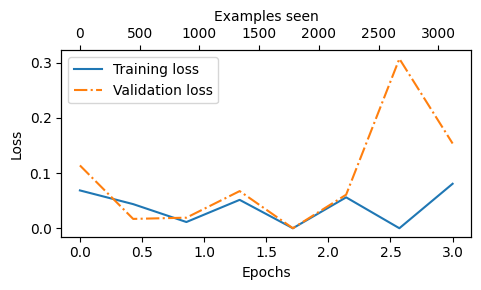

In [ ]:
import matplotlib.pyplot as plt
def plot_values(
        epochs_seen, examples_seen, train_values, val_values,
        label="loss"):
    fig, ax1 = plt.subplots(figsize=(5, 3))
 #1
    ax1.plot(epochs_seen.cpu().numpy(), [t.cpu().item() for t in train_values], label=f"Training {label}") # Move epochs_seen and train_values to CPU before plotting
    ax1.plot(
        epochs_seen.cpu().numpy(), [t.cpu().item() for t in val_values], linestyle="-.", # Move epochs_seen and val_values to CPU before plotting
        label=f"Validation {label}"
    )
    ax1.set_xlabel("Epochs")
    ax1.set_ylabel(label.capitalize())
    ax1.legend()
 #2
    ax2 = ax1.twiny()
    ax2.plot(examples_seen.cpu().numpy(), [t.cpu().item() for t in train_values], alpha=0)    # Move examples_seen and train_values to CPU before plotting #3
    ax2.set_xlabel("Examples seen")
    fig.tight_layout()             #4
    plt.savefig(f"{label}-plot.pdf")
    plt.show()
epochs_tensor = torch.linspace(0, num_epochs, len(train_losses))
examples_seen_tensor = torch.linspace(0, examples_seen, len(train_losses))
plot_values(epochs_tensor, examples_seen_tensor, train_losses, val_losses)

In [ ]:
train_accuracy = calc_accuracy_loader(train_loader, model, device)
val_accuracy = calc_accuracy_loader(val_loader, model, device)
test_accuracy = calc_accuracy_loader(test_loader, model, device)
print(f"Training accuracy: {train_accuracy*100:.2f}%")
print(f"Validation accuracy: {val_accuracy*100:.2f}%")
print(f"Test accuracy: {test_accuracy*100:.2f}%")

Training accuracy: 100.00%
Validation accuracy: 100.00%
Test accuracy: 100.00%


In [ ]:
def classify_review(text,model,tokenizer,device,max_length=None,pad_token_id=50256):
  model.eval()
  input_ids=tokenizer.encode(text)
  supported_context_length=model.pos_emb.weight.shape[1]
  input_ids=input_ids[:min(max_length,supported_context_length)]
  input_ids+=[pad_token_id]*(max_length-len(input_ids))
  input_tensor=torch.tensor(input_ids,device=device).unsqueeze(0)
  with torch.no_grad():
    logits=model(input_tensor)[:,-1,:]
  predicted_label=torch.argmax(logits,dim=-1).item()
  return "spam" if predicted_label==1 else "not spam"

In [ ]:
text_1=("You are a winner you have been specially selected to receive $1000 cash or a $2000 award.")
print(classify_review(text_1,model,tokenizer,device,max_length=train_dataset.max_length))

spam


In [ ]:
text_2=("Hey, just wanted to check if we're still on for dinner tonight? Let me know!")
print(classify_review(text_2,model,tokenizer,device,max_length=train_dataset.max_length))

not spam


In [ ]:
torch.save(model.state_dict(),"review_classifier.pth")

In [ ]:
model_state_dict=torch.load("review_classifier.pth",map_location=device)
model.load_state_dict(model_state_dict)

<All keys matched successfully>